In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import re

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Data
df = pd.read_csv('Data.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.shape

(129880, 24)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
On-board Service,129880.0,3.383023,1.287099,0.0,2.00,4.0,4.00,5.0


## Data Cleaning

In [5]:
# Checking for duplicates
df.duplicated().sum()

0

In [6]:
#How much Percent of the NULL values does esch column contains
df.isnull().sum()/len(df)*100

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

In [7]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].mean())

In [8]:
df.isnull().sum()/len(df)*100

ID                                        0.0
Gender                                    0.0
Age                                       0.0
Customer Type                             0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment           

In [9]:
# Dropping the unnecessary ID column
df.drop(columns = 'ID', inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  object 
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [11]:
# Flight Distance is Data Type is object when it should be float64
df['Flight Distance'].dtypes

dtype('O')

In [12]:
# That's because there are some characters in between some of the numbers. We got to Fix that...

for i in range(len(df['Flight Distance'])):
    df['Flight Distance'][i] = re.sub(r'[^0-9]', '', str(df['Flight Distance'][i]))
    
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors = 'coerce').astype('float64')
df['Flight Distance'].dtypes

dtype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  float64
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [14]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470.0,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447.0,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308.0,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337.0,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337.0,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


# EDA

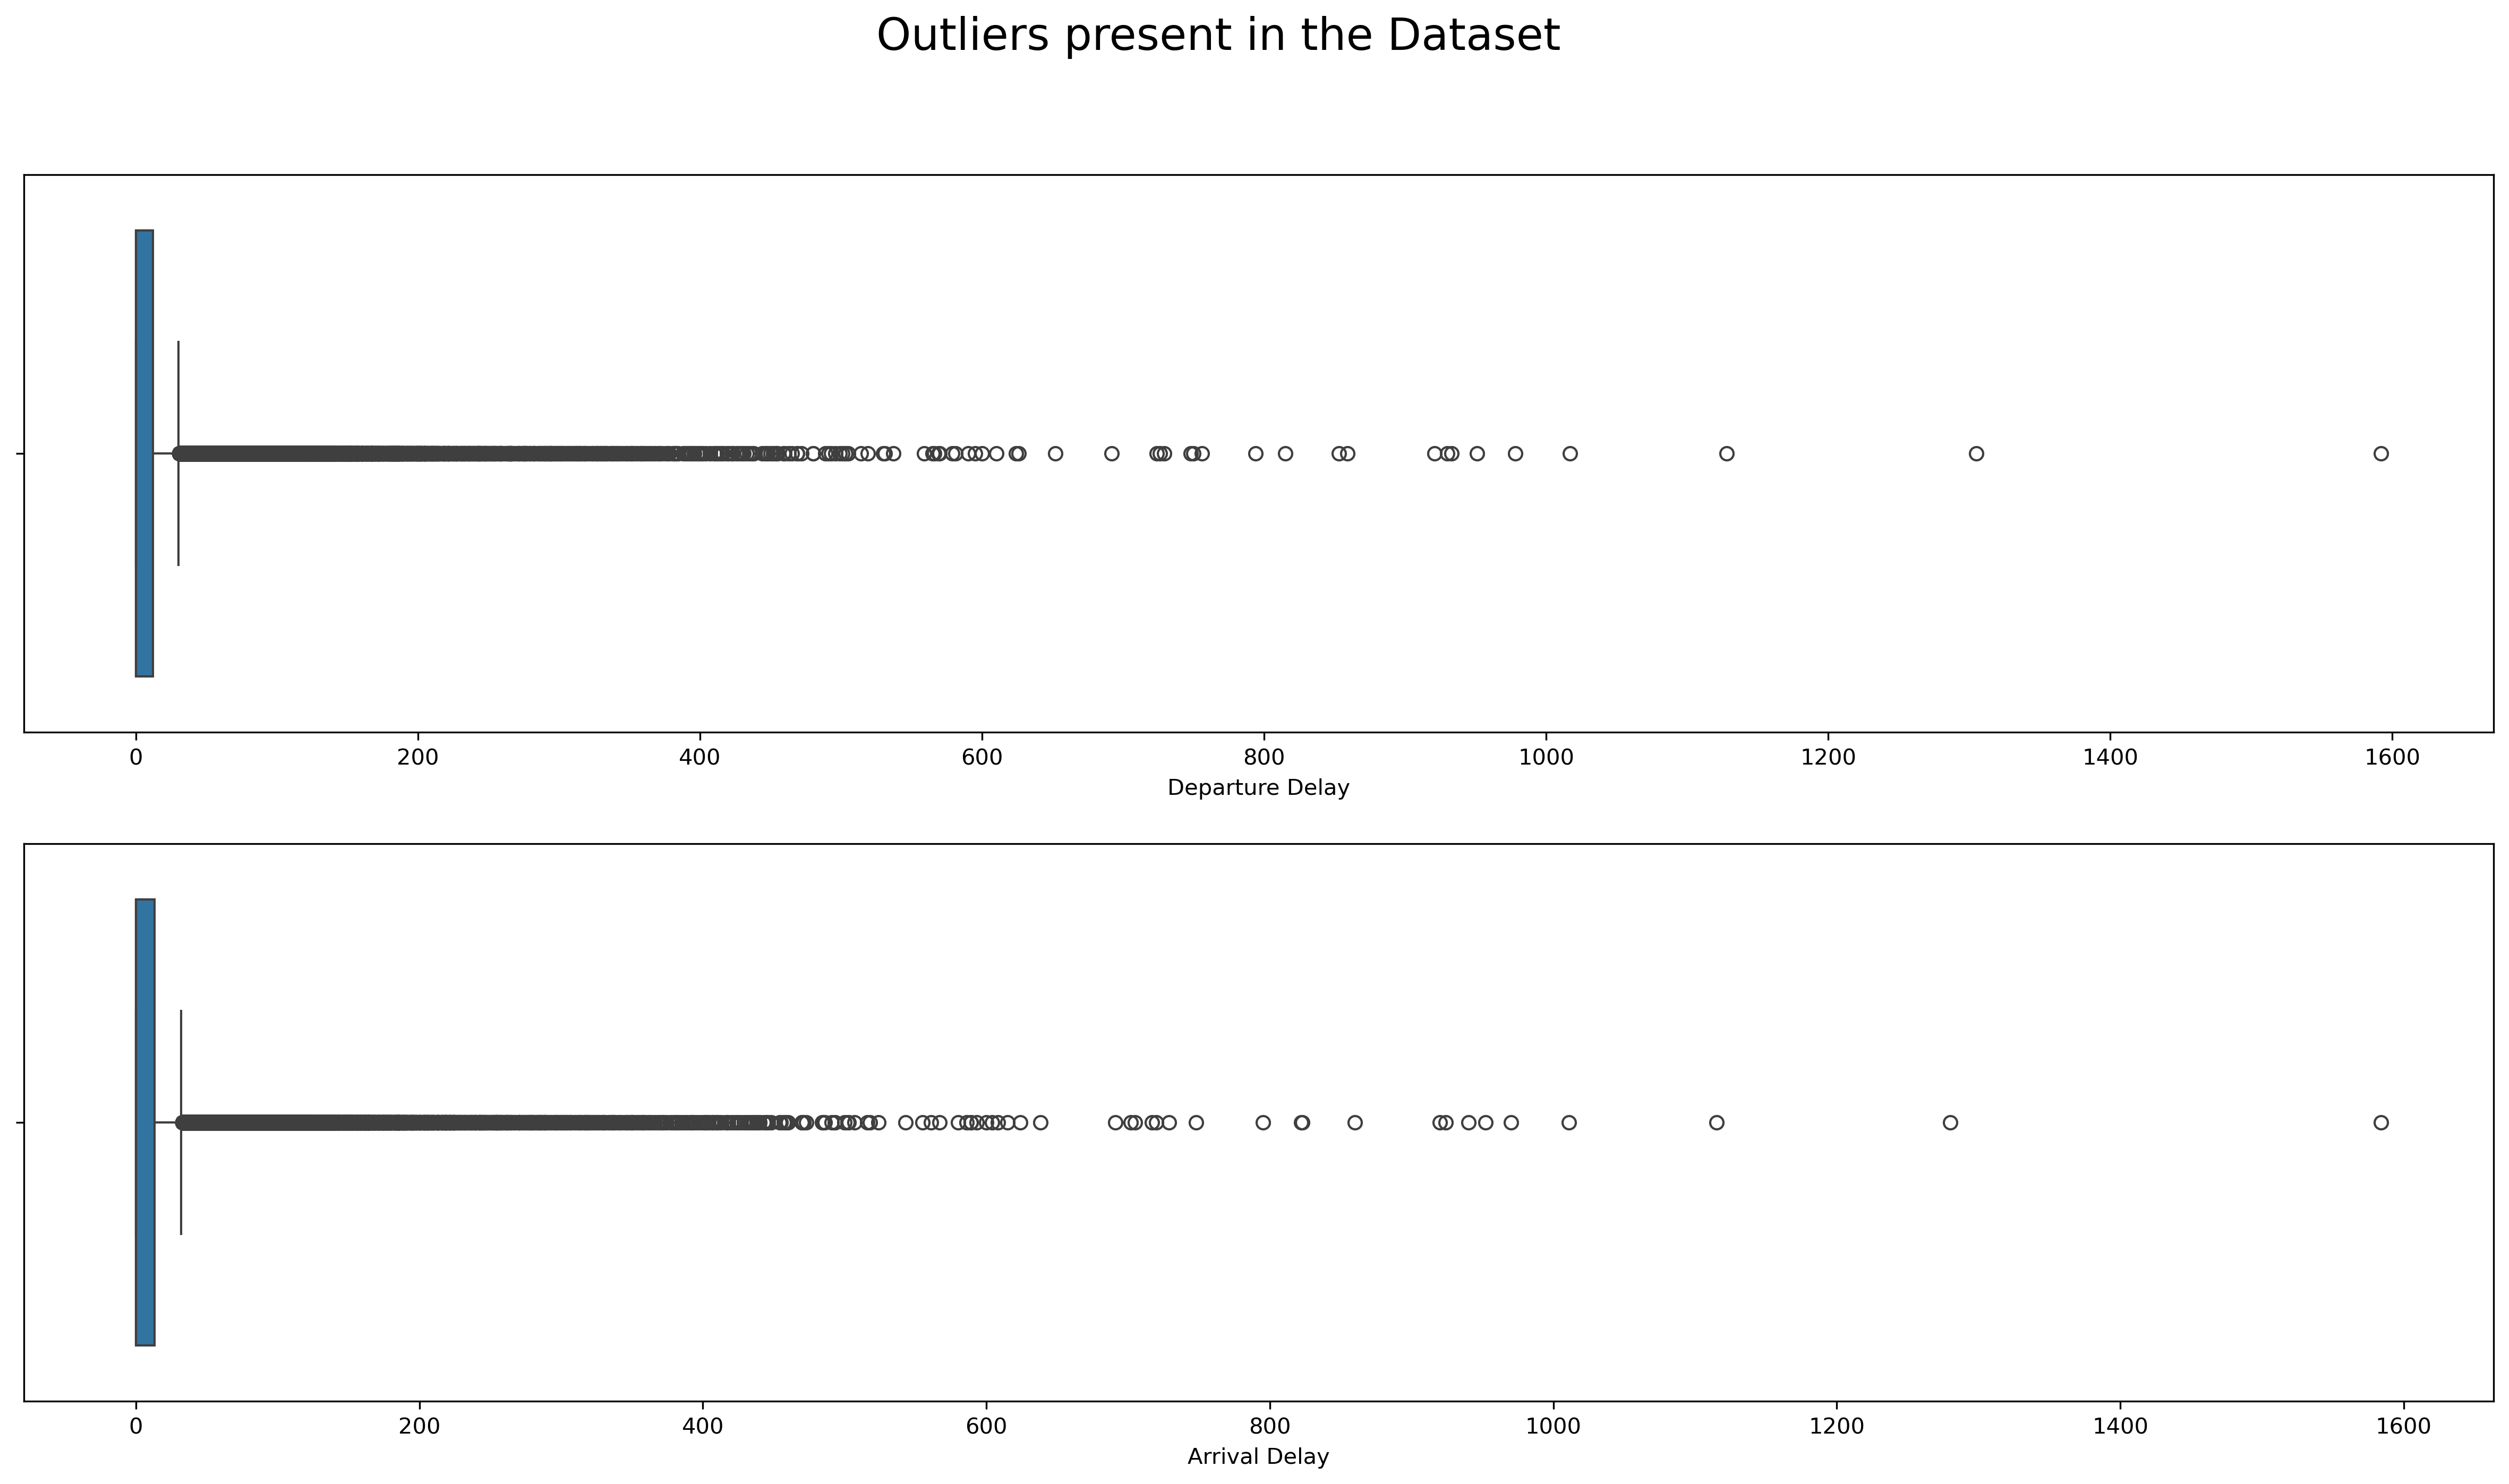

In [15]:
# Checking for Outliers

f,a = plt.subplots(2,1, figsize=(20,10), dpi=300)
sns.boxplot(x=df['Departure Delay'], ax=a[0])
sns.boxplot(x=df['Arrival Delay'], ax=a[1])
plt.suptitle('Outliers present in the Dataset', fontsize=20)
plt.show()

<Axes: xlabel='Satisfaction', ylabel='count'>

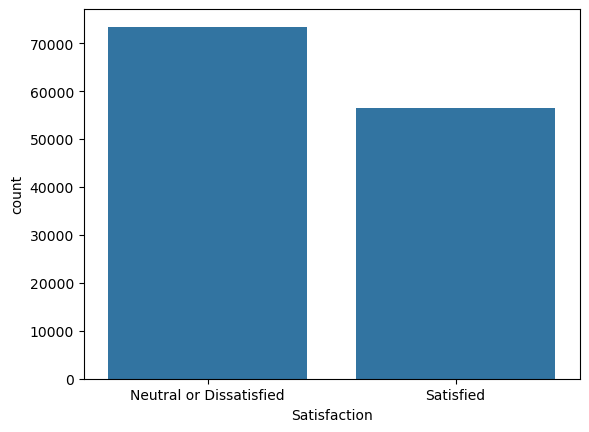

In [16]:
# Number of values of both classes

sns.countplot(x = df['Satisfaction'])

<Figure size 2000x1000 with 0 Axes>

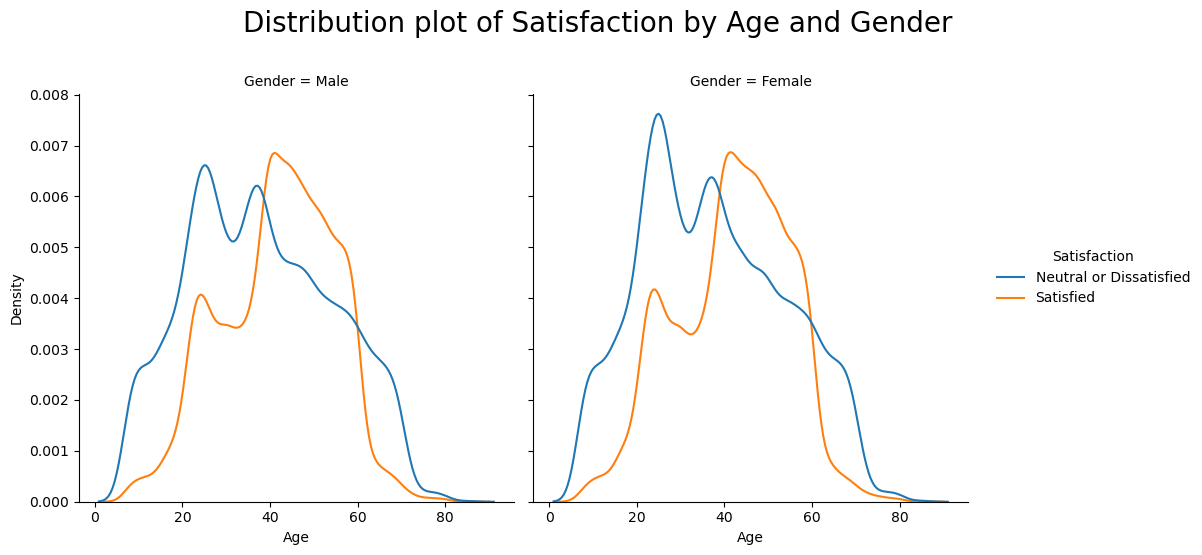

In [17]:
# Distribution plot of Satisfaction based on Age and Gender

plt.figure(figsize = (20,10))
sns.displot(data=df, kind='kde', x=df['Age'], hue=df['Satisfaction'], col=df['Gender'])
plt.suptitle('Distribution plot of Satisfaction by Age and Gender', y = 1.1, fontsize=20)
plt.show()

<Figure size 2000x1000 with 0 Axes>

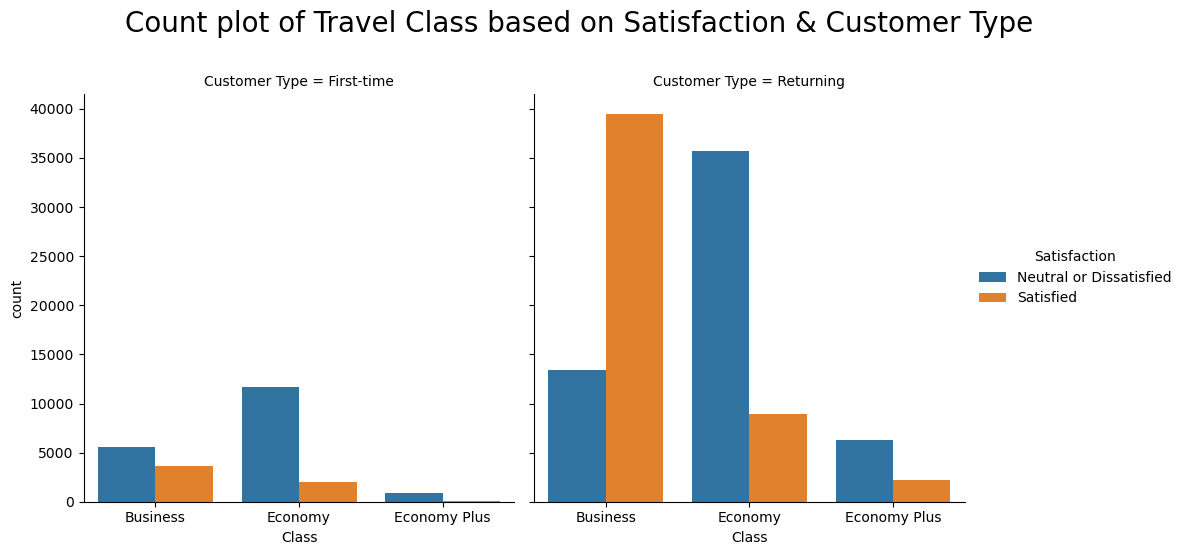

In [18]:
# Count plot of Travel Class based on Satisfaction & Customer Type

plt.figure(figsize = (20,10))
sns.catplot(data=df, kind='count', x=df['Class'], hue=df['Satisfaction'], col=df['Customer Type'])
plt.suptitle('Count plot of Travel Class based on Satisfaction & Customer Type', y = 1.1, fontsize=20)
plt.show()

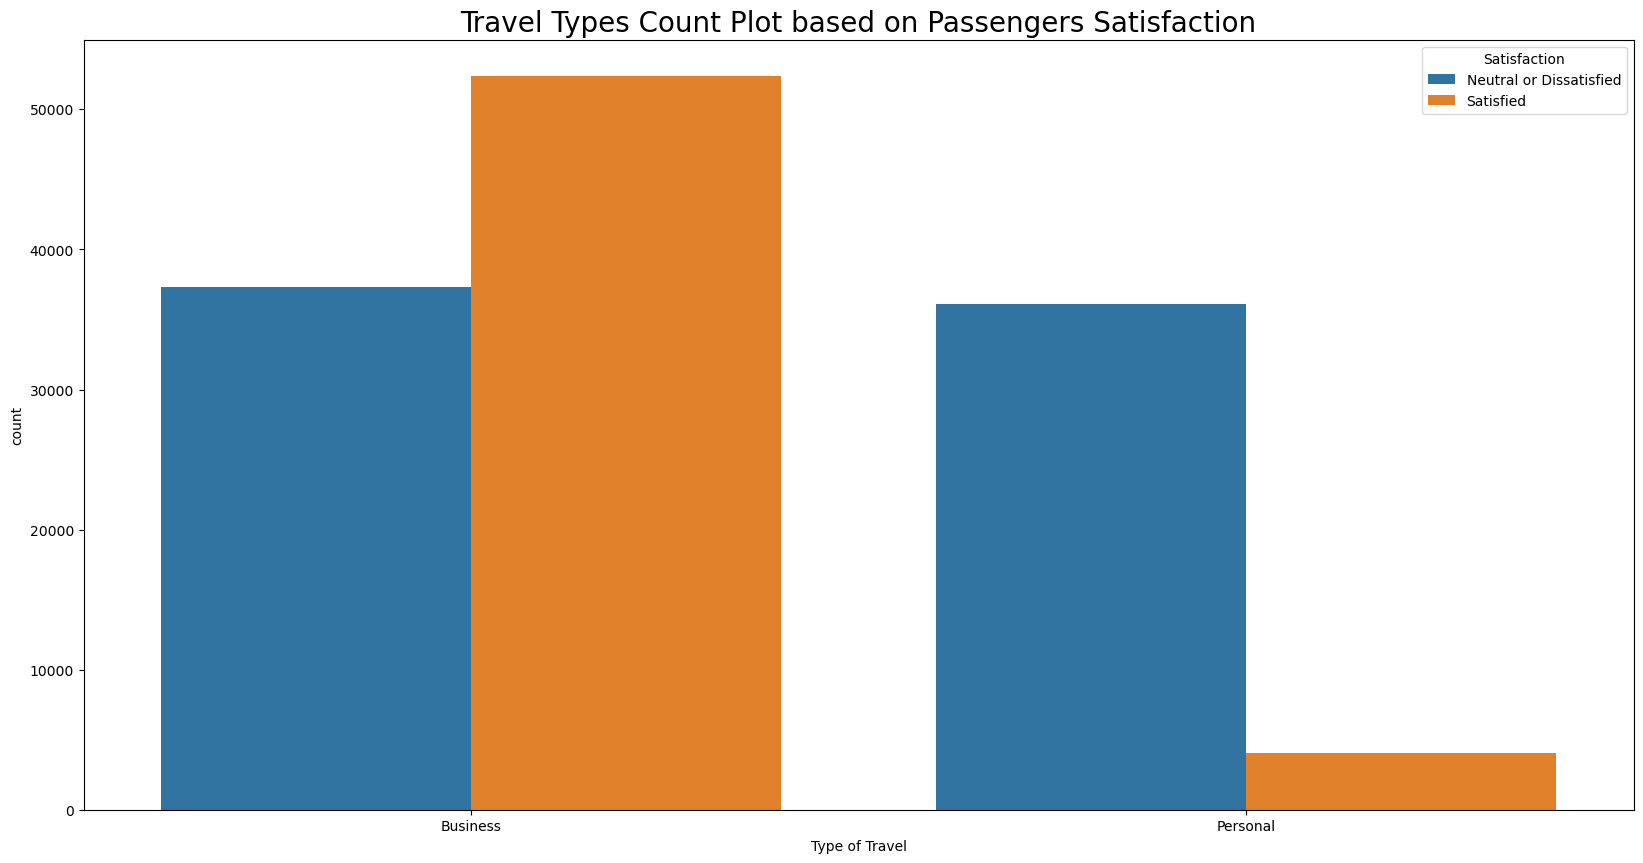

In [19]:
# Type of Travel by Satisfaction Count Plot

plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df['Type of Travel'], hue=df['Satisfaction'])
plt.title('Travel Types Count Plot based on Passengers Satisfaction', fontsize = 20)
plt.show()

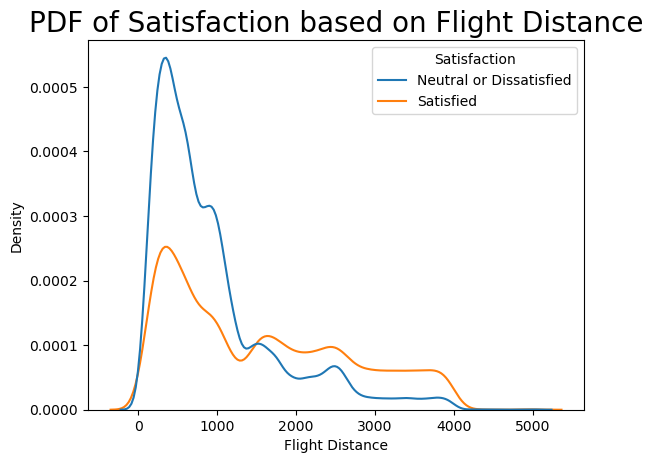

In [20]:
# PDF of Satisfaction based on Flight Distance 

sns.kdeplot(data=df, x=df['Flight Distance'], hue=df['Satisfaction'])
plt.title('PDF of Satisfaction based on Flight Distance', fontsize=20)
plt.show()

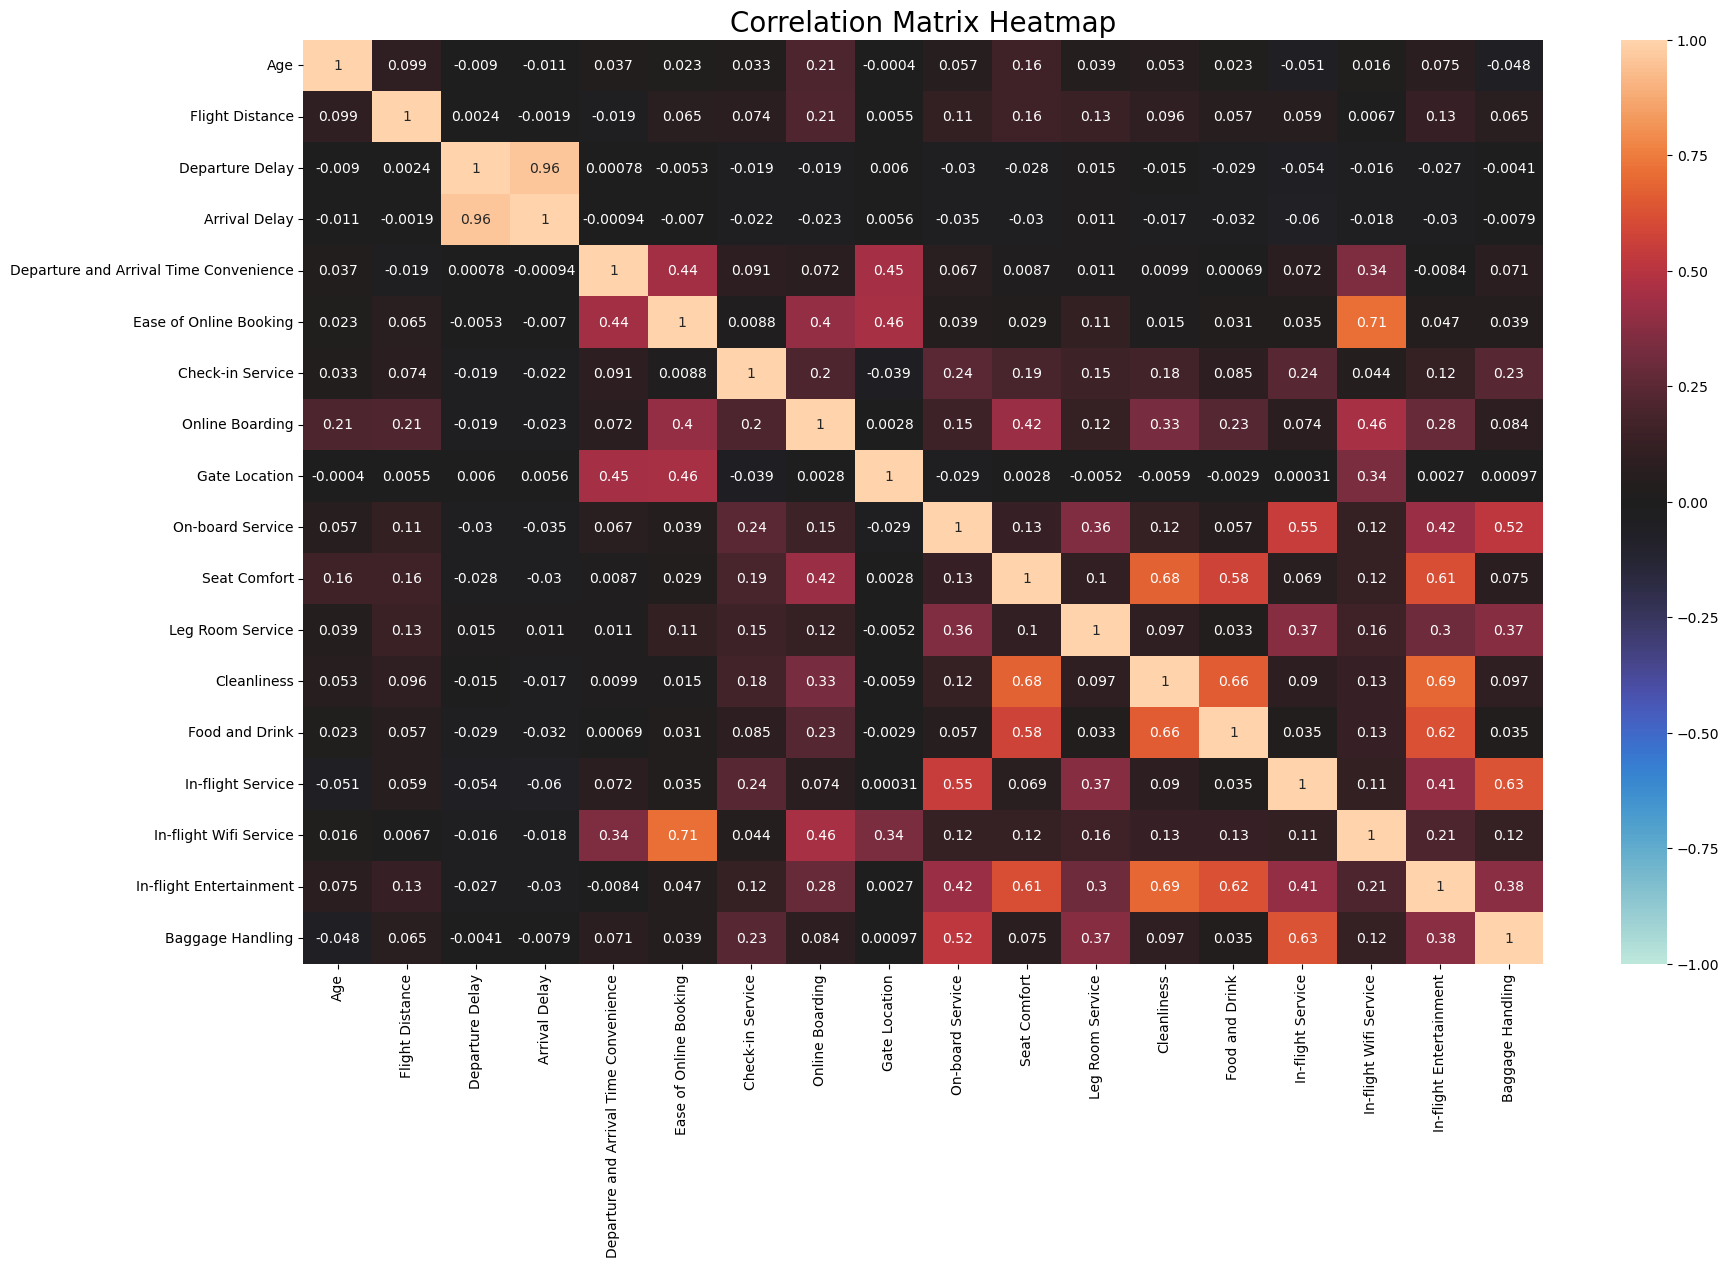

In [21]:
# Plotting Heatmap for Correlation
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(numeric_only=True), vmin = -1, vmax = 1, center = 0, annot=True)
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

# Feature Engineering

In [22]:
x = df.drop(columns='Satisfaction')
y = df['Satisfaction']

In [23]:
y

0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
129875    Neutral or Dissatisfied
129876    Neutral or Dissatisfied
129877    Neutral or Dissatisfied
129878                  Satisfied
129879    Neutral or Dissatisfied
Name: Satisfaction, Length: 129880, dtype: object

In [24]:
# Encoding the Satisfaction field: 'Neutral or Dissatisfied' to 0 and 'Satisfied' to 1
encod_satisfaction = {'Neutral or Dissatisfied': 0, 'Satisfied': 1}
y = y.map(encod_satisfaction)

In [25]:
y

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

In [26]:
y.unique()

array([0, 1], dtype=int64)

In [27]:
x.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,3,3,5,2,5,5,5,3,5,5
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,2,5,4,5,5,3,5,2,5,5
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,4,3,5,3,5,5,3,4,3,3
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,2,5,5,5,4,4,5,2,5,5
4,Female,49,Returning,Business,Business,3470.0,0,1.0,3,3,...,3,3,4,4,5,4,3,3,3,3


In [28]:
# Now Applying One-Hot Encoding on the input columns
x_encoded = pd.get_dummies(x)
x_encoded

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,48,821.0,2,5.0,3,3,4,3,3,3,...,5,False,True,True,False,True,False,True,False,False
1,35,821.0,26,39.0,2,2,3,5,2,5,...,5,True,False,False,True,True,False,True,False,False
2,41,853.0,0,0.0,4,4,4,5,4,3,...,3,False,True,False,True,True,False,True,False,False
3,50,1905.0,0,0.0,2,2,3,4,2,5,...,5,False,True,False,True,True,False,True,False,False
4,49,3470.0,0,1.0,3,3,3,5,3,3,...,3,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,447.0,2,3.0,4,4,4,4,2,5,...,4,False,True,False,True,False,True,False,False,True
129876,41,308.0,0,0.0,5,3,5,3,4,5,...,5,False,True,False,True,False,True,False,False,True
129877,42,337.0,6,14.0,5,2,4,2,1,3,...,5,False,True,False,True,False,True,False,False,True
129878,50,337.0,31,22.0,4,4,3,4,1,4,...,5,False,True,False,True,False,True,False,False,True


In [29]:
# Now Applying Robust Scaler on the numerical input columns
# As it works quite good on Outliers and some of the columns here contains outliers

In [30]:
rs = RobustScaler()

In [31]:
numerical_cols = x_encoded.select_dtypes(include = 'number').columns
numerical_cols

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [32]:
x_scaler = x_encoded
x_scaler[numerical_cols] = pd.DataFrame(rs.fit_transform(x_encoded[numerical_cols]))
x_scaler.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,0.333333,-0.017293,0.166667,0.384615,0.0,0.0,1.0,0.0,0.0,-0.5,...,0.5,False,True,True,False,True,False,True,False,False
1,-0.208333,-0.017293,2.166667,3.000000,-0.5,-0.5,0.0,1.0,-0.5,0.5,...,0.5,True,False,False,True,True,False,True,False,False
2,0.041667,0.006767,0.000000,0.000000,0.5,0.5,1.0,1.0,0.5,-0.5,...,-0.5,False,True,False,True,True,False,True,False,False
3,0.416667,0.797744,0.000000,0.000000,-0.5,-0.5,0.0,0.5,-0.5,0.5,...,0.5,False,True,False,True,True,False,True,False,False
4,0.375000,1.974436,0.000000,0.076923,0.0,0.0,0.0,1.0,0.0,-0.5,...,-0.5,True,False,False,True,True,False,True,False,False


# Model Building & Evaluation

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.2, random_state=101, stratify=y)

#### Logistic Regression

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [35]:
# For Training Data
y_train_pred_logreg = logreg.predict(x_train)

In [36]:
print(classification_report(y_train_pred_logreg, y_train))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     60508
           1       0.84      0.87      0.85     43396

    accuracy                           0.87    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.88      0.87      0.87    103904



In [37]:
print(roc_auc_score(y_train_pred_logreg, y_train))

0.8739640152920898


In [38]:
# For Testing Data
y_test_pred_logreg = logreg.predict(x_test)

In [39]:
print(classification_report(y_test_pred_logreg, y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     15156
           1       0.83      0.87      0.85     10820

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.88      0.87      0.87     25976



In [40]:
print(roc_auc_score(y_test_pred_logreg, y_test))

0.8733492076733457


In [41]:
# Cross Validation Performance
cross_val_logreg = cross_val_score(logreg, x_train, y_train, scoring = 'accuracy', cv = 5)
print('Logistic Regression Cross Validation Accuracy: ', np.mean(cross_val_logreg))

Logistic Regression Cross Validation Accuracy:  0.8744129204052399


#### Decision Tree

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
# For Training Data
y_train_pred_dtc = dtc.predict(x_train)

In [44]:
print(classification_report(y_train_pred_dtc, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58762
           1       1.00      1.00      1.00     45142

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [45]:
print(roc_auc_score(y_train_pred_dtc, y_train))

1.0


In [46]:
# For Testing Data
y_test_pred_dtc = dtc.predict(x_test)

In [47]:
print(classification_report(y_test_pred_dtc, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14640
           1       0.94      0.94      0.94     11336

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.94     25976
weighted avg       0.95      0.95      0.95     25976



In [48]:
print(roc_auc_score(y_test_pred_dtc, y_test))

0.9447341705519627


In [51]:
# Cross Validation Performance
cross_val_dtc_accuracy = cross_val_score(dtc, x_train, y_train, scoring = 'accuracy', cv = 5)
print('Decision Tree Classifier Cross Validation Accuracy: ', np.mean(cross_val_dtc_accuracy))

cross_val_dtc_roc = cross_val_score(dtc, x_train, y_train, scoring = 'roc_auc', cv = 5)
print('Decision Tree Classifier Cross Validation ROC AUC Score: ', np.mean(cross_val_dtc_roc))

Decision Tree Classifier Cross Validation Accuracy:  0.9456902629877861
Decision Tree Classifier Cross Validation ROC AUC Score:  0.9448257837640657


In [52]:
# Hyperparameter Tuning

param_grid = {
    'max_depth' : [5, 10, 15, None],
    'min_samples_leaf' : [1, 3, 5, 7],
    'min_samples_split' : [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)
grid_search_dtc.fit(x_train, y_train)

# Get the Best estimator from the grid search
best_dtc = grid_search_dtc.best_estimator_
print('Best Parameters : ', best_dtc, end = '\n')

# Prediction using the best estimator
y_pred_dtc = best_dtc.predict(x_test)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters :  DecisionTreeClassifier(max_depth=15, min_samples_leaf=3)


In [53]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14690
           1       0.96      0.93      0.95     11286

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [54]:
print(roc_auc_score(y_test, y_pred_dtc))

0.9505325730523682


#### Random Forest

In [55]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
# For Training Data
y_train_pred_rfc = rfc.predict(x_train)
print(classification_report(y_train_pred_rfc, y_train))
print('ROC AUC Score: ',roc_auc_score(y_train_pred_rfc, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58763
           1       1.00      1.00      1.00     45141

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904

ROC AUC Score:  0.9999914912444906


In [57]:
# For Testing Data
y_test_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test_pred_rfc, y_test))
print('ROC AUC Score: ',roc_auc_score(y_test_pred_rfc, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15064
           1       0.94      0.97      0.96     10912

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

ROC AUC Score:  0.9638824495446993


In [58]:
# Cross Validation Performance
cross_val_rfc_accuracy = cross_val_score(rfc, x_train, y_train, scoring = 'accuracy', cv = 5)
print('Random Forest Classifier Cross Validation Accuracy: ', np.mean(cross_val_rfc_accuracy))

cross_val_rfc_roc = cross_val_score(rfc, x_train, y_train, scoring = 'roc_auc', cv = 5)
print('Random Forest Classifier Cross Validation ROC AUC Score: ', np.mean(cross_val_rfc_roc))

Random Forest Classifier Cross Validation Accuracy:  0.9634470301427986
Random Forest Classifier Cross Validation ROC AUC Score:  0.9940286459983156


In [59]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [5, 10, 15, None],
    'min_samples_leaf' : [1, 3, 5],
    'min_samples_split' : [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)
grid_search_rfc.fit(x_train, y_train)

# Get the Best estimator from the grid search
best_rfc = grid_search_rfc.best_estimator_
print('Best Parameters : ', best_rfc, end = '\n')

# Prediction using the best estimator
y_pred_rfc = best_rfc.predict(x_test)

print(classification_report(y_pred_rfc, y_test))
print('ROC AUC Score: ',roc_auc_score(y_pred_rfc, y_test))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters :  RandomForestClassifier(min_samples_split=6)
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15040
           1       0.94      0.97      0.96     10936

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

ROC AUC Score:  0.9649906516054725


#### Gradient Boosting Classifier

In [60]:
gbc = GradientBoostingClassifier(random_state=101)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=101)

In [61]:
# Model Performance Evaluation
y_pred_gbc = gbc.predict(x_test)
print(classification_report(y_pred_gbc, y_test))
print('ROC AUC Score: ',roc_auc_score(y_pred_gbc, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14981
           1       0.92      0.95      0.93     10995

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

ROC AUC Score:  0.9436080092840957


In [62]:
# Cross Validation Performance
cross_val_gbc_accuracy = cross_val_score(gbc, x_train, y_train, scoring = 'accuracy', cv = 5)
print('Gradient Boosting Classifier Cross Validation Accuracy: ', np.mean(cross_val_gbc_accuracy))

cross_val_gbc_roc = cross_val_score(gbc, x_train, y_train, scoring = 'roc_auc', cv = 5)
print('Gradient Boosting Classifier Cross Validation ROC AUC Score: ', np.mean(cross_val_gbc_roc))

Gradient Boosting Classifier Cross Validation Accuracy:  0.9420330381564301
Gradient Boosting Classifier Cross Validation ROC AUC Score:  0.9876477522387127


In [63]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1]
}

grid_search_gbc = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)
grid_search_gbc.fit(x_train, y_train)

# Get the Best estimator from the grid search
best_gbc = grid_search_gbc.best_estimator_
print('Best Parameters : ', best_gbc, end = '\n')

# Prediction using the best estimator
y_pred_gridsearch_gbc = best_gbc.predict(x_test)

print(classification_report(y_pred_gridsearch_gbc, y_test))
print('ROC AUC Score: ',roc_auc_score(y_pred_gridsearch_gbc, y_test))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters :  GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=5, random_state=101)
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15024
           1       0.94      0.97      0.96     10952

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

ROC AUC Score:  0.9646517604946282


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

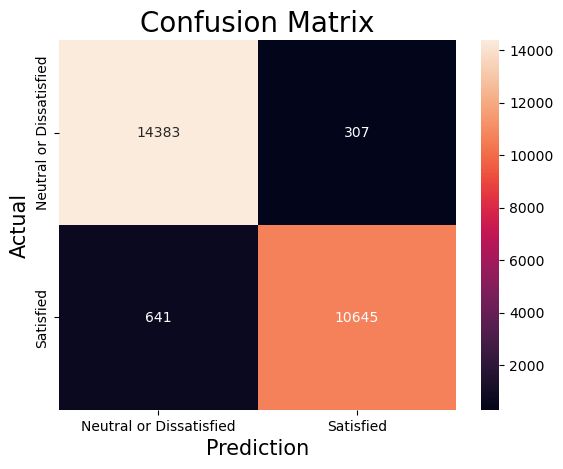

In [66]:
# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gridsearch_gbc)

# Plotting the Confusion Matrix
sns.heatmap(cm, fmt='g', xticklabels = ['Neutral or Dissatisfied', 'Satisfied'], yticklabels = ['Neutral or Dissatisfied', 'Satisfied'], annot = True)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.title('Confusion Matrix', fontsize = 20)